# SVM

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load data (replace 'your_dataset.csv' with the actual file name)
data = pd.read_csv('UniversalBank.csv')

# Ensure the dataset has at least 6 features, including one for classification

# Randomly shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Extract features and target variable
X_train = train_data.drop('CreditCard', axis=1)
y_train = train_data['CreditCard']

X_test = test_data.drop('CreditCard', axis=1)
y_test = test_data['CreditCard']

# Convert categorical target variable to numerical
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Define categorical and numeric features
categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create a transformer for data preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Add PCA to the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),  # Adjust the explained variance threshold as needed
    ('classifier', SVC())  # Using Support Vector Classifier with default settings
])

# Parameter selection using GridSearchCV
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],  # Regularization parameter
    'classifier__kernel': ['linear', 'rbf', 'poly'],  # Kernel type
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters found by the grid search
best_params = grid_search.best_params_

# Cross-validation predictions
cv_predictions = grid_search.predict(X_train)

# Classification error
classification_error = 1 - accuracy_score(y_train, cv_predictions)

# Confusion matrix
conf_matrix = confusion_matrix(y_train, cv_predictions)

# Classification report
classification_rep = classification_report(y_train, cv_predictions)

# Output results
print("Best Parameters:", best_params)
print("Classification Error: {:.2f}%".format(classification_error * 100))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Best Parameters: {'classifier__C': 0.1, 'classifier__kernel': 'poly'}
Classification Error: 25.18%
Confusion Matrix:
 [[2819   24]
 [ 983  174]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.99      0.85      2843
           1       0.88      0.15      0.26      1157

    accuracy                           0.75      4000
   macro avg       0.81      0.57      0.55      4000
weighted avg       0.78      0.75      0.68      4000



# MLR

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np



# Load data (replace 'UniversalBank.csv' with your actual file name)
data = pd.read_csv('UniversalBank.csv')

# Randomly shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Extract features and target variable
X_train = train_data.drop('CreditCard', axis=1)
y_train = train_data['CreditCard']

X_test = test_data.drop('CreditCard', axis=1)
y_test = test_data['CreditCard']

# Convert categorical target variable to numerical
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Define categorical and numeric features
categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create a transformer for data preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Add PCA to the pipeline if needed
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),  # Adjust as needed
    ('regressor', LinearRegression())  # Use Linear Regression
])

# Cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions
predictions_train = pipeline.predict(X_train)
predictions_test = pipeline.predict(X_test)

# Set a threshold for classification
threshold = 0.5
binary_predictions_train = np.where(predictions_train >= threshold, 1, 0)
binary_predictions_test = np.where(predictions_test >= threshold, 1, 0)

# Calculate classification metrics
classification_rep_train = classification_report(y_train, binary_predictions_train)
classification_rep_test = classification_report(y_test, binary_predictions_test)

# Calculate classification error
classification_error_train = 1 - accuracy_score(y_train, binary_predictions_train)
classification_error_test = 1 - accuracy_score(y_test, binary_predictions_test)

# Output results
print("Classification Report (Train):\n", classification_rep_train)
print("Classification Report (Test):\n", classification_rep_test)
print("Classification Error (Train): {:.2f}%".format(classification_error_train * 100))
print("Classification Error (Test): {:.2f}%".format(classification_error_test * 100))


Classification Report (Train):
               precision    recall  f1-score   support

           0       0.74      0.98      0.85      2843
           1       0.79      0.15      0.26      1157

    accuracy                           0.74      4000
   macro avg       0.77      0.57      0.55      4000
weighted avg       0.76      0.74      0.68      4000

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.73      0.98      0.83       687
           1       0.80      0.19      0.31       313

    accuracy                           0.73      1000
   macro avg       0.76      0.59      0.57      1000
weighted avg       0.75      0.73      0.67      1000

Classification Error (Train): 25.62%
Classification Error (Test): 26.70%


# BP

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load data (replace 'UniversalBank.csv' with your actual file name)
data = pd.read_csv('UniversalBank.csv')

# Randomly shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Extract features and target variable
X_train = train_data.drop('CreditCard', axis=1)
y_train = train_data['CreditCard']

X_test = test_data.drop('CreditCard', axis=1)
y_test = test_data['CreditCard']

# Convert categorical target variable to numerical
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Define categorical and numeric features
categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create a transformer for data preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Add PCA to the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),
    ('classifier', MLPClassifier(max_iter=1000))  
])

# Parameter selection using GridSearchCV
param_grid = {
    'classifier__hidden_layer_sizes': [(100,), (50, 50), (50, 25, 10)],
    'classifier__activation': ['relu', 'logistic'],
    'classifier__alpha': [0.0001, 0.001, 0.01]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters found by the grid search
best_params = grid_search.best_params_

# Cross-validation predictions
cv_predictions = grid_search.predict(X_train)

# Classification error
classification_error = 1 - accuracy_score(y_train, cv_predictions)

# Confusion matrix
conf_matrix = confusion_matrix(y_train, cv_predictions)

# Classification report
classification_rep = classification_report(y_train, cv_predictions)

# Output results
print("Best Parameters:", best_params)
print("Classification Error: {:.2f}%".format(classification_error * 100))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)



Best Parameters: {'classifier__activation': 'logistic', 'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (50, 25, 10)}
Classification Error: 25.40%
Confusion Matrix:
 [[2816   27]
 [ 989  168]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.99      0.85      2843
           1       0.86      0.15      0.25      1157

    accuracy                           0.75      4000
   macro avg       0.80      0.57      0.55      4000
weighted avg       0.78      0.75      0.67      4000



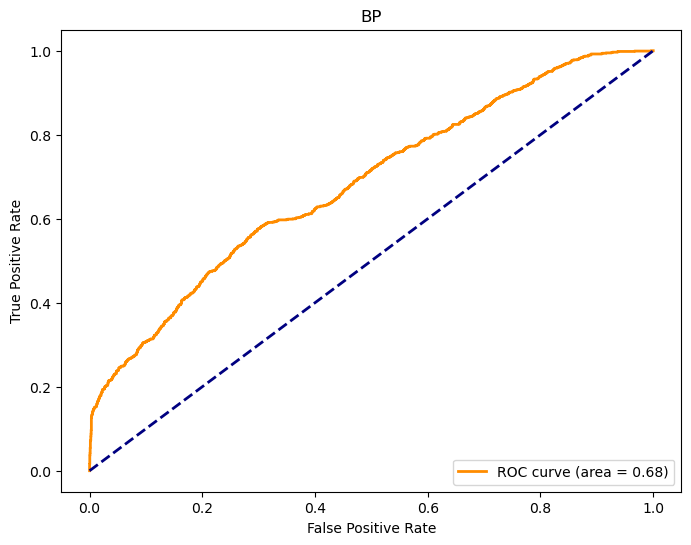

In [8]:
from sklearn.metrics import roc_curve, auc

# Obtain decision function scores for the positive class (class 1)
decision_function_scores = grid_search.decision_function(X_train)

# Calculate ROC Curve for Training Set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, decision_function_scores)
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC Curve for Training Set
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BP')
plt.legend(loc="lower right")
plt.show()
